In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
P0 = 1000
R = 0.286
Rd = 287
Lv = 2500000
Cp = 1005
g= 9.8

In [8]:
T = 288.5
q = 9.5*10**(-3)
Z = 900

In [9]:
#effective T
Te = T+q*(Lv/Cp)
# theta
theta=T*(P0/1000)**(R) 
thetaE = Te*(P0/1000)**(R)
# pressure height
P = P0*(((-g*R)/(Rd*theta))*(Z)+1)**(1/R)

In [10]:
print(P)

897.4671744572225


In [168]:
H = np.linspace(0,1800,181)

a = P.shape
print(a)
rthetaL = np.zeros(a[0])
qt = np.zeros(a[0])
qt1 = np.zeros(a[0])
H0 =  np.zeros(a[0])
rthetaL[:] = 288.5
qt[:] = 9.5*10**-3
qt1[:] = 9.5*10**-3
for i in range(0,181):
    if H[i]>900:
        rthetaL[i] = 297 + ((H[i]-900)/900)*(306-297)
        qt[i] = (4.8*10**-3) -((H[i]-900)/900)*(4.8-2.2)*10**-3
        qt1[i] = (4.8*10**-3) -((H[i]-900)/900)*(4.8-2.2)*10**-3
H0[:] = 0
#ref_pressure = np.around(P,decimals=-1)

(181,)


In [169]:
P = 1000*(((-g*R)/(Rd*rthetaL))*(H)+1)**(1/R)

In [205]:
print(P[27])
print(H[27])

968.4062046832508
270.0


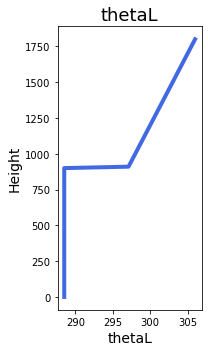

In [195]:
f = plt.figure(figsize=(3,5))
plt.plot(rthetaL,H[:],c='royalblue',linewidth='4')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Height',color='k',fontsize=14)
plt.xlabel('thetaL',color='k',fontsize=14)
plt.title('thetaL',fontsize=18)
plt.tight_layout()
plt.savefig('hw0_thetaL.png',dpi=400)

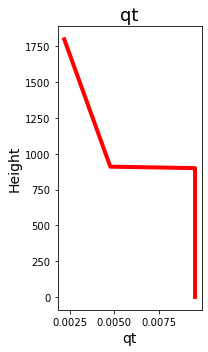

In [196]:
f = plt.figure(figsize=(3,5))
plt.plot(qt1,H[:],c='red',linewidth='4')
plt.ylabel('Height',color='k',fontsize=14)
plt.xlabel('qt',color='k',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('qt',fontsize=18)
plt.tight_layout()
plt.savefig('hw0_qt.png',dpi=400)

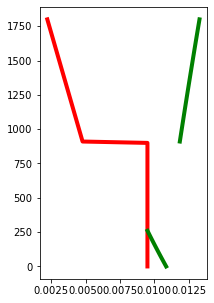

In [173]:
f = plt.figure(figsize=(3,5))
plt.plot(qt,H[:],c='red',linewidth='4')
plt.plot(PE[0:27],H[0:27],c='green',linewidth='4')
plt.plot(PE[91:],H[91:],c='green',linewidth='4')

In [206]:
test = (1000/P)**(R)

In [207]:
rT = (rthetaL/test) 

In [208]:
E0 = 6.11 
#t = 15
erT = rT-273.15
E = E0*(10**((7.5*erT)/(237+erT)))
PE = 0.622*E/P


In [209]:
print(PE)

[0.01086534 0.01081012 0.01075513 0.01070037 0.01064584 0.01059155
 0.01053748 0.01048365 0.01043004 0.01037666 0.0103235  0.01027057
 0.01021787 0.01016539 0.01011314 0.0100611  0.01000929 0.00995771
 0.00990634 0.00985519 0.00980426 0.00975355 0.00970306 0.00965279
 0.00960273 0.00955289 0.00950326 0.00945385 0.00940465 0.00935566
 0.00930689 0.00925833 0.00920997 0.00916183 0.0091139  0.00906618
 0.00901866 0.00897135 0.00892425 0.00887735 0.00883066 0.00878418
 0.0087379  0.00869182 0.00864594 0.00860026 0.00855479 0.00850951
 0.00846444 0.00841956 0.00837489 0.00833041 0.00828613 0.00824204
 0.00819815 0.00815445 0.00811095 0.00806764 0.00802453 0.0079816
 0.00793887 0.00789633 0.00785398 0.00781182 0.00776985 0.00772807
 0.00768647 0.00764506 0.00760384 0.0075628  0.00752195 0.00748128
 0.0074408  0.0074005  0.00736038 0.00732044 0.00728069 0.00724111
 0.00720172 0.0071625  0.00712346 0.00708461 0.00704592 0.00700742
 0.00696909 0.00693093 0.00689295 0.00685515 0.00681752 0.00678

In [177]:
#print(P.shape)
#print(P[0:20])
#print(qt[0:20]-PE[0:18])
diff = qt-PE
aa=np.zeros((181))
aa[diff[:]>0] = 1 
#print(aa)
#print(P[aa>0])
#print(H[aa>0])
print(rT[27])
print(qt[27])
print(PE[27])
#start from H[27] H[90] end
print(rT[26])
print(qt[26])
print(PE[26])

285.8632195121951
0.0095
0.009453848270079668
285.9608780487805
0.0095
0.009503260966700705


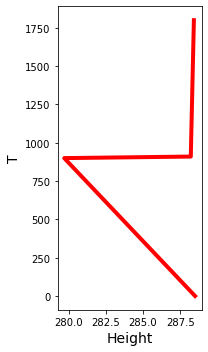

In [178]:
f = plt.figure(figsize=(3,5))
plt.plot(rT,H[:],c='red',linewidth='4')
plt.ylabel('T',color='k',fontsize=14)
plt.xlabel('Height',color='k',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

In [179]:
q1 = PE[27]
T1 = rT[27]
print(q1)
print(T1)

0.009453848270079668
285.8632195121951


In [180]:
lapse = g*((1+((Lv*q1)/(Rd*T1)))/(Cp+((Lv*Lv*q1*0.622)/(Rd*T1*T1))))*10
print(lapse)
#K/km

0.049078339015479644


In [181]:
qv = qt
qc = np.zeros((181))
print(qv.shape)
print(qc.shape)
T = rT

(181,)
(181,)


In [182]:

E0 = 6.11 
#t = 15
qs = PE[27]
Ts = rT[27]
print(Ts)
lapse = g*((1+((Lv*qs)/(Rd*Ts)))/(Cp+((Lv*Lv*qs*0.622)/(Rd*Ts*Ts))))*10
Ts = Ts - lapse
print(Ts)
for i in range(0,63):
    #print(H[28+i])
    #print(Ts)
    erT = Ts-273.15
    E = E0*(10**((7.5*erT)/(237+erT)))
    qs = 0.622*E/P[28+i]
    qv[28+i] = qs
    T[28+i] = Ts
    lapse = g*((1+((Lv*qs)/(Rd*Ts)))/(Cp+((Lv*Lv*qs*0.622)/(Rd*Ts*Ts))))*10
    Ts = Ts - lapse
    #print(lapse,Ts)


285.8632195121951
285.8141411731796


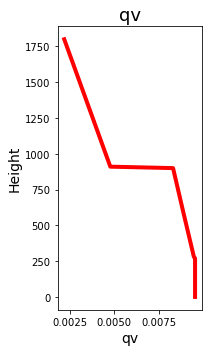

In [200]:
f = plt.figure(figsize=(3,5))
#plt.plot(qc,H[:],c='red',linewidth='4')
plt.plot(qv,H[:],c='red',linewidth='4')
plt.ylabel('Height',color='k',fontsize=14)
plt.xlabel('qv',color='k',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('qv',fontsize=18)
plt.tight_layout()
plt.savefig('hw0_qv.png',dpi=400)

In [184]:
qc=qt1-qv

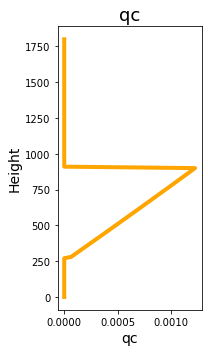

In [201]:
f = plt.figure(figsize=(3,5))
plt.plot(qc,H[:],c='orange',linewidth='4')
#plt.plot(qv,H[:],c='red',linewidth='4')
plt.ylabel('Height',color='k',fontsize=14)
plt.xlabel('qc',color='k',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('qc',fontsize=18)
plt.tight_layout()
plt.savefig('hw0_qc.png',dpi=400)

In [210]:
print(np.max(qc))

0.001227820862651767


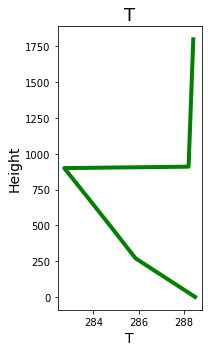

In [202]:
f = plt.figure(figsize=(3,5))
plt.plot(T,H[:],c='green',linewidth='4')
#plt.plot(qv,H[:],c='red',linewidth='4')
plt.ylabel('Height',color='k',fontsize=14)
plt.xlabel('T',color='k',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('T',fontsize=18)
plt.tight_layout()
plt.savefig('hw0_T.png',dpi=400)

In [214]:
print(T[90])

282.71018745395406


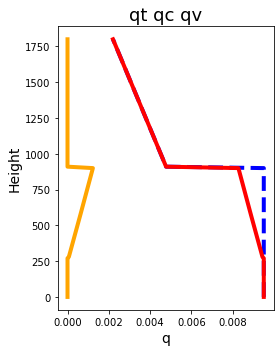

In [225]:
f = plt.figure(figsize=(4,5))
plt.plot(qt1,H[:],c='blue',linewidth='4',linestyle='dashed')
plt.plot(qv,H[:],c='red',linewidth='4')
plt.plot(qc,H[:],c='orange',linewidth='4')
plt.ylabel('Height',color='k',fontsize=14)
plt.xlabel('q',color='k',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('qt qc qv',fontsize=18)
#plt.grid()
plt.tight_layout()
plt.savefig('hw0_allq.png',dpi=400)